In [34]:
#Importing the required libraries

In [42]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization
from tensorflow.keras.models import load_model
from PIL import Image


In [2]:
#Loading the Data

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [4]:
#Analyzing the Data

In [5]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

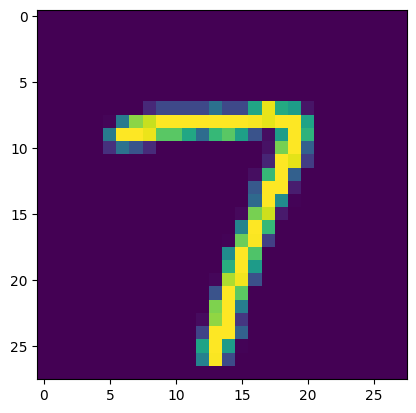

In [7]:
plt.imshow(x_train[5100])

In [8]:
np.argmax(y_train[5100])

0

In [9]:
#Reshaping the Data

In [10]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [11]:
#Applying one hot encoding

In [12]:
classes = 10 

In [13]:
y_train = np_utils.to_categorical (y_train, classes) 
y_test = np_utils.to_categorical (y_test, classes)

In [14]:
#Adding  CNN Buliding

In [15]:
model=Sequential()

In [16]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))

In [17]:
model.add(Conv2D(64,(3,3),activation='relu'))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(classes,activation='softmax'))

In [20]:
#Compiling The Model

In [21]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [22]:
#Training the Model

In [23]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 559s 296ms/step - loss: 0.3032 - accuracy: 0.9553 - val_loss: 0.0871 - val_accuracy: 0.9747
Epoch 2/5
1875/1875 [==============================] - 679s 362ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0865 - val_accuracy: 0.9771
Epoch 3/5
1875/1875 [==============================] - 421s 224ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0934 - val_accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 448s 239ms/step - loss: 0.0332 - accuracy: 0.9901 - val_loss: 0.0830 - val_accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 382s 204ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.1097 - val_accuracy: 0.9794


In [24]:
#Observing The Metrics

In [34]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Metrice(Test loss & Test Accuracy):")
print(metrics)

Metrice(Test loss & Test Accuracy):
[0.10966705530881882, 0.9793999791145325]


In [35]:
#Test the Model

In [36]:
prediction=model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 381ms/step
[[2.73197883e-18 1.00938192e-23 3.04461290e-13 1.68268413e-10
  5.12648385e-27 1.87056783e-18 1.92154701e-28 1.00000000e+00
  2.43541246e-18 9.12728213e-14]
 [1.20137967e-17 1.90655127e-19 1.00000000e+00 5.18809544e-14
  4.87991377e-25 2.23229839e-23 7.25044590e-13 4.13526598e-23
  3.36971089e-18 5.42689366e-25]
 [6.77542378e-09 9.99953508e-01 1.47589788e-07 4.18287258e-13
  2.17987015e-08 2.96319172e-07 6.68196443e-10 2.60070546e-12
  4.61261479e-05 4.06899652e-14]
 [1.00000000e+00 1.04563627e-20 1.15473846e-10 9.01551429e-17
  2.26060123e-17 1.52589378e-12 2.29174582e-10 1.48968003e-19
  2.12662700e-12 2.03401118e-09]]


In [28]:
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [37]:
#Saving the model

In [38]:
model.save("Model/digitrec.h5")

In [39]:
#Test with Saved Model

In [43]:
model=load_model("./Model/digitrec.h5")

1/1 [==============================] - 0s 40ms/step


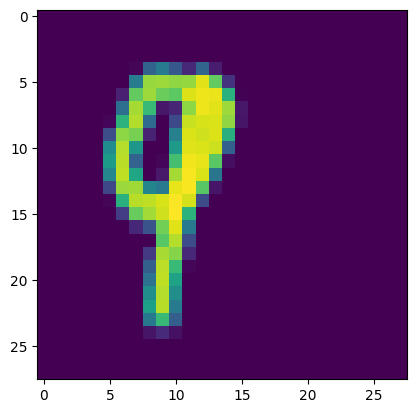

In [46]:
img=Image.open("test2.png").convert("L")
img=img.resize((28,28))
im2arr=np.array(img)
plt.imshow(im2arr)
im2arr=im2arr.reshape(1,28,28,1)
y_pred=list(model.predict(im2arr))

In [47]:
print(y_pred.index(max(y_pred)))

0
